In [3]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the confifuration of the plots we will create



In [4]:
# Read in the Data 

df = pd.read_csv(r'Desktop\movies.csv')

In [5]:
# Let's Look at the Data 
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
# Let's see of there is any missing Data:
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2829942618675013%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [7]:
# Data types for our  Columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
df = df.fillna(0)

In [9]:
# Ch4
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [10]:
df[['released','ReleaseCountry']] = df.released.str.split("(", expand=True)

In [11]:
df['ReleaseCountry'] = df['ReleaseCountry'].astype('str')
df['ReleaseCountry'] = df['ReleaseCountry'].astype(str).str[:-1]

In [12]:
# Create correct Year Column
df['yearcorrect'] = df['released'].astype(str).str[-5:]


In [13]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,ReleaseCountry,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0,United States,2020
7664,Dream Round,0,Comedy,2020,"February 7, 2020",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,United States,2020
7665,Saving Mbango,0,Drama,2020,"April 27, 2020",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0,Cameroon,2020
7666,It's Just Us,0,Drama,2020,"October 1, 2020",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0,United States,2020


In [14]:
#df.sort_values(by=['gross'], inplace=False, ascending=False)

In [15]:
# show up all The content of Data
pd.set_option('display.max_rows', None)

In [16]:
# DROP any Duplicates
df['company'] = df['company'].astype(str)
df['company'].drop_duplicates().sort_values(ascending=False)

#df.drop_duplicates()

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [17]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,ReleaseCountry,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States,1980


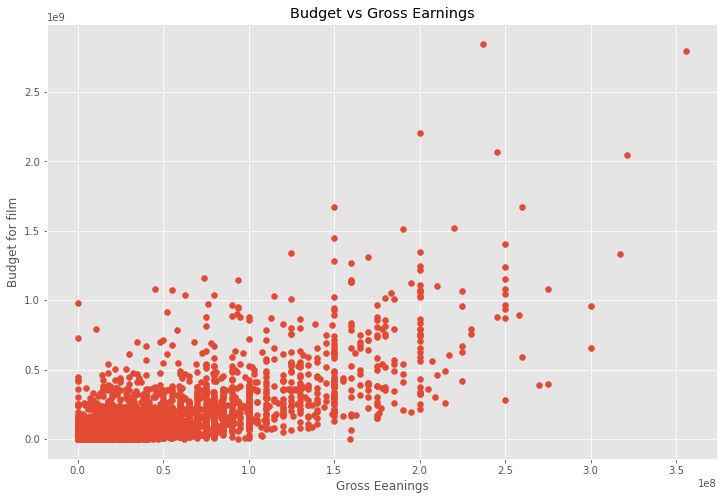

In [18]:
#  Scatter Plot with Budget vs Gross
plt.scatter(x= df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Eeanings')
plt.ylabel('Budget for film')
plt.show()

In [19]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,ReleaseCountry,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States,1980


<AxesSubplot:xlabel='budget', ylabel='gross'>

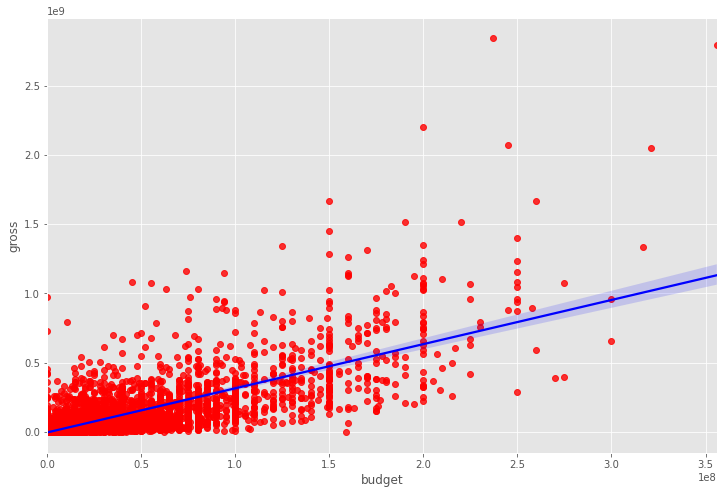

In [20]:
# Plot the Budget vs Gross Usinf SeaBorn

sns.regplot(x= 'budget', y='gross', data=df, 
            scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [21]:
# Let's Start Looking at Correlation

correlation_matrix = df.corr(method ='pearson') # Pearson, Kendall, spearman

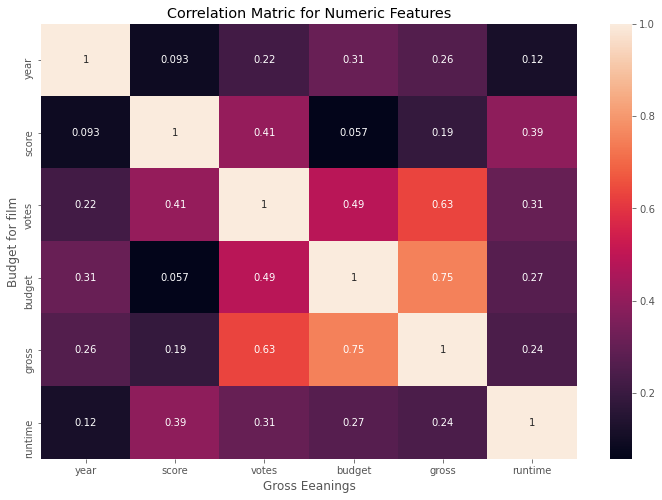

In [22]:
# High Correlation between Budget and Gross

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Gross Eeanings')
plt.ylabel('Budget for film')
plt.show()

In [23]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()
    

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,ReleaseCountry,yearcorrect
0,6587,7,6,1980,1510,8.4,927000.0,2589,4015,1048,55,19000000,46998772,2320,146.0,56,0
1,5573,7,1,1980,1311,5.8,65000.0,2269,1633,328,56,4500000,58853106,732,104.0,56,0
2,5142,5,0,1980,1568,8.7,1200000.0,1111,2568,1746,56,18000000,538375067,1541,124.0,56,0
3,286,5,4,1980,1311,7.7,221000.0,1301,2001,2247,56,3500000,83453539,1813,88.0,56,0
4,1027,7,4,1980,1360,7.3,108000.0,1054,522,411,56,6000000,39846344,1778,98.0,56,0


In [24]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,ReleaseCountry,yearcorrect
0,6587,7,6,1980,1510,8.4,927000.0,2589,4015,1048,55,19000000,46998772,2320,146.0,56,0
1,5573,7,1,1980,1311,5.8,65000.0,2269,1633,328,56,4500000,58853106,732,104.0,56,0
2,5142,5,0,1980,1568,8.7,1200000.0,1111,2568,1746,56,18000000,538375067,1541,124.0,56,0
3,286,5,4,1980,1311,7.7,221000.0,1301,2001,2247,56,3500000,83453539,1813,88.0,56,0
4,1027,7,4,1980,1360,7.3,108000.0,1054,522,411,56,6000000,39846344,1778,98.0,56,0


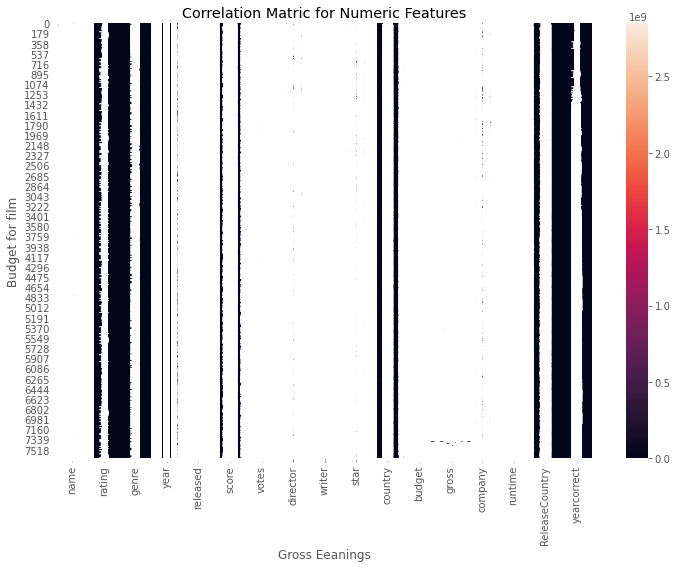

In [25]:
sns.heatmap(df_numerized, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Gross Eeanings')
plt.ylabel('Budget for film')
plt.show()

In [26]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,ReleaseCountry,yearcorrect
name,1.000000,-0.008069,0.016355,0.011453,-0.011223,0.016377,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020534,0.006989,0.009212,0.008483,-0.000569,0.011134
rating,-0.008069,1.000000,0.072423,0.008779,0.015735,0.006192,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081928,-0.095450,-0.032954,0.064133,0.025061,0.007054
genre,0.016355,0.072423,1.000000,-0.081261,0.029039,0.027384,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334010,-0.234297,-0.071066,-0.052914,-0.090843,-0.077550
year,0.011453,0.008779,-0.081261,1.000000,-0.000832,0.092616,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309184,0.261900,-0.010433,0.116358,-0.088273,0.997295
released,-0.011223,0.015735,0.029039,-0.000832,1.000000,0.039939,0.016892,-0.001275,-0.002421,0.015597,-0.020063,0.010653,0.002010,-0.009930,0.005002,-0.046511,-0.005538
score,0.016377,0.006192,0.027384,0.092616,0.039939,1.000000,0.407101,0.010568,0.022098,-0.000026,-0.133346,0.056867,0.186012,0.005067,0.394564,-0.094112,0.100212
votes,0.013038,0.033743,-0.145296,0.222427,0.016892,0.407101,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486929,0.632870,0.133455,0.306984,0.092341,0.217856
director,0.009079,0.019483,-0.015258,-0.020795,-0.001275,0.010568,0.000349,1.000000,0.299067,0.039234,0.017490,0.004948,-0.014916,0.004404,0.017062,0.013293,-0.020439
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002421,0.022098,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025932,-0.022997,0.005644,-0.004036,-0.001848,-0.008807
star,0.006472,0.013405,-0.005477,-0.027242,0.015597,-0.000026,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019967,-0.001129,0.012437,0.009418,-0.023568,-0.027576


In [27]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name            name              1.000000
                rating           -0.008069
                genre             0.016355
                year              0.011453
                released         -0.011223
                score             0.016377
                votes             0.013038
                director          0.009079
                writer            0.009081
                star              0.006472
                country          -0.010737
                budget            0.020534
                gross             0.006989
                company           0.009212
                runtime           0.008483
                ReleaseCountry   -0.000569
                yearcorrect       0.011134
rating          name             -0.008069
                rating            1.000000
                genre             0.072423
                year              0.008779
                released          0.015735
                score             0.006192
           

In [28]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre           budget           -0.334010
budget          genre            -0.334010
gross           genre            -0.234297
genre           gross            -0.234297
votes           genre            -0.145296
genre           votes            -0.145296
country         score            -0.133346
score           country          -0.133346
rating          gross            -0.095450
gross           rating           -0.095450
score           ReleaseCountry   -0.094112
ReleaseCountry  score            -0.094112
yearcorrect     ReleaseCountry   -0.090884
ReleaseCountry  yearcorrect      -0.090884
genre           ReleaseCountry   -0.090843
ReleaseCountry  genre            -0.090843
year            ReleaseCountry   -0.088273
ReleaseCountry  year             -0.088273
yearcorrect     country          -0.082274
country         yearcorrect      -0.082274
budget          rating           -0.081928
rating          budget           -0.081928
year            genre            -0.081261
genre      

In [29]:
High_corr = sorted_pairs[(sorted_pairs) > 0.5]
High_corr 

gross           votes             0.632870
votes           gross             0.632870
gross           budget            0.750159
budget          gross             0.750159
year            yearcorrect       0.997295
yearcorrect     year              0.997295
name            name              1.000000
writer          writer            1.000000
runtime         runtime           1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
ReleaseCountry  ReleaseCountry    1.000000
yearcorrect     yearcorrect       1.000000
dtype: floa

In [ ]:
 # Votes and Budget Have the Highest Correlation to GROSS Earnings